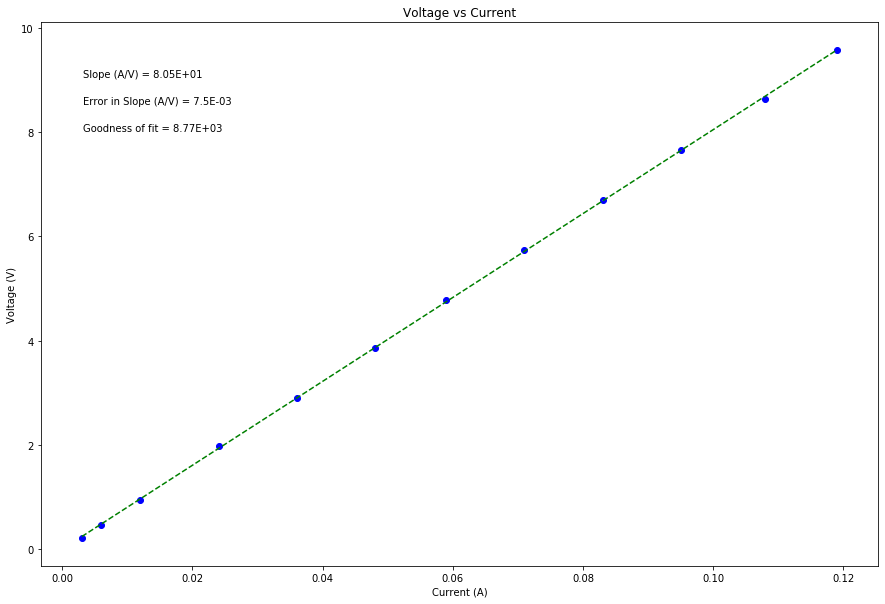

In [2]:

import numpy as np
import matplotlib.pyplot as plt

current = np.array([0.003, 0.006, 0.012, 0.024, 0.036, 0.048, 0.059, 0.071, 0.083, 0.095, 0.108, 0.119]) 
voltage = np.array([0.212, 0.466, 0.952, 1.984, 2.898, 3.855, 4.784, 5.737, 6.69, 7.65, 8.64, 9.58])


err_yvariable = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])


x = current
y = voltage
dy = err_yvariable
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D

D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) 
db = np.sqrt(1/D*sum(x**2/dy**2)) 

def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") 
 
plt.annotate('Slope (A/V) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (A/V) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


